<a href="https://colab.research.google.com/github/mangoseeds/machine-learning/blob/main/5_Support%20Vector%20Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 서포트 벡터 머신(Support Vector Machines)

* 회귀, 분류, 이상치 탐지 등에 사용되는 지도학습 방법
* 클래스 사이의 경계에 위치한 데이터 포인트를 서포트 벡터(support vector)라고 함
* 각 지지 벡터가 클래스 사이의 결정 경계를 구분하는데 얼마나 중요한지를 학습
* 각 지지 벡터 사이의 마진이 가장 큰 방향으로 학습
* 지지 벡터 까지의 거리와 지지 벡터의 중요도를 기반으로 예측을 수행

![support vector machine](https://upload.wikimedia.org/wikipedia/commons/thumb/2/20/Svm_separating_hyperplanes.png/220px-Svm_separating_hyperplanes.png)

* H3은 두 클래스의 점들을 제대로 분류하고 있지 않음
* H1과 H2는 두 클래스의 점들을 분류하는데, H2가 H1보다 더 큰 마진을 갖고 분류하는 것을 확인할 수 있음

In [7]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [8]:
from sklearn.svm import SVR, SVC
from sklearn.datasets import fetch_california_housing, load_diabetes
from sklearn.datasets import load_breast_cancer, load_iris, load_wine
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

## SVM을 이용한 회귀 모델과 분류 모델

### SVM을 사용한 회귀 모델 (SVR)

In [9]:
# X, y = fetch_california_housing(return_X_y = True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

# model = SVR()
# model.fit(X_train, y_train)

# print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
# print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

### SVM을 사용한 분류 모델 (SVC)

In [10]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

model = SVC()
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9014084507042254
평가 데이터 점수: 0.9230769230769231


## 커널 기법

* 입력 데이터를 고차원 공간에 사상해서 비선형 특징을 학습할 수 있도록 확장하는 방법
* scikit-learn에서는 Linear, Polynomial, RBF(Radial Basis Function)등 다양한 커널 기법을 지원

![kernel trick](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_0011.png)

In [11]:
# X, y = fetch_california_housing(return_X_y = True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

# linear_svr = SVR(kernel = 'linear')
# linear_svr.fit(X_train, y_train)

# print("Linear SVR 학습 데이터 점수: {}".format(linear_svr.score(X_train, y_train)))
# print("Linear SVR 평가 데이터 점수: {}".format(linear_svr.score(X_test, y_test)))


# polynomial_svr = SVR(kernel = 'poly')
# polynomial_svr.fit(X_train, y_train)

# print("Polynomial SVR 학습 데이터 점수: {}".format(polynomial_svr.score(X_train, y_train)))
# print("Polynomial SVR 평가 데이터 점수: {}".format(polynomial_svr.score(X_test, y_test)))


# rbf_svr = SVR(kernel = 'rbf')
# rbf_svr.fit(X_train, y_train)

# print("RBF SVR 학습 데이터 점수: {}".format(rbf_svr.score(X_train, y_train)))
# print("RBF SVR 평가 데이터 점수: {}".format(rbf_svr.score(X_test, y_test)))


In [12]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

linear_svc = SVC(kernel = 'linear')
linear_svc.fit(X_train, y_train)

print("Linear SVC 학습 데이터 점수: {}".format(linear_svc.score(X_train, y_train)))
print("Linear SVC 평가 데이터 점수: {}".format(linear_svc.score(X_test, y_test)))


polynomial_svc = SVC(kernel = 'poly')
polynomial_svc.fit(X_train, y_train)

print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))


rbf_svc = SVC(kernel = 'rbf')
rbf_svc.fit(X_train, y_train)

print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

Linear SVC 학습 데이터 점수: 0.960093896713615
Linear SVC 평가 데이터 점수: 0.986013986013986
Polynomial SVC 학습 데이터 점수: 0.9014084507042254
Polynomial SVC 평가 데이터 점수: 0.9230769230769231
RBF SVC 학습 데이터 점수: 0.9014084507042254
RBF SVC 평가 데이터 점수: 0.9230769230769231


## 매개변수 튜닝

* SVM은 사용하는 커널에 따라 다양한 매개변수 설정 가능
* 매개변수를 변경하면서 성능변화를 관찰

In [13]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [14]:
polynomial_svc = SVC(kernel = 'poly', degree = 2, C = 0.1, gamma = 'auto')
polynomial_svc.fit(X_train, y_train)

print("kernel = poly, degree = {}, C = {}, gamma = {}".format(2, 0.1, 'auto'))
print("Polynomial SVC 학습 데이터 점수: {}".format(polynomial_svc.score(X_train, y_train)))
print("Polynomial SVC 평가 데이터 점수: {}".format(polynomial_svc.score(X_test, y_test)))

kernel = poly, degree = 2, C = 0.1, gamma = auto
Polynomial SVC 학습 데이터 점수: 0.9835680751173709
Polynomial SVC 평가 데이터 점수: 0.993006993006993


In [15]:
rbf_svc = SVC(kernel = 'rbf', C = 2.0, gamma = 'scale')
rbf_svc.fit(X_train, y_train)

print("kernel = poly, degree = {}, C = {}, gamma = {}".format(2, 2.0, 'scale'))
print("RBF SVC 학습 데이터 점수: {}".format(rbf_svc.score(X_train, y_train)))
print("RBF SVC 평가 데이터 점수: {}".format(rbf_svc.score(X_test, y_test)))

kernel = poly, degree = 2, C = 2.0, gamma = scale
RBF SVC 학습 데이터 점수: 0.9154929577464789
RBF SVC 평가 데이터 점수: 0.9370629370629371


## 데이터 전처리

* SVM은 입력 데이터가 정규화 되어야 좋은 성능을 보임
* 주로 모든 특성 값을 [0, 1] 범위로 맞추는 방법을 사용
* scikit-learn의 StandardScaler 또는 MinMaxScaler를 사용해 정규화

In [16]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 123)

In [17]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9014084507042254
SVC 평가 데이터 점수: 0.9230769230769231


In [18]:
#normalize with StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9835680751173709
SVC 평가 데이터 점수: 0.986013986013986


In [20]:
#normalize with MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = SVC()
model.fit(X_train, y_train)

print("SVC 학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("SVC 평가 데이터 점수: {}".format(model.score(X_test, y_test)))

SVC 학습 데이터 점수: 0.9812206572769953
SVC 평가 데이터 점수: 0.986013986013986


## Linear SVR

### 캘리포니아 주택 가격

In [22]:
# X, y = fetch_california_housing(return_X_y = True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [24]:
# model = SVR(kernel = 'linear')
# model.fit(X_train, y_train)

In [25]:
# print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
# print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [26]:
# #SVM은 저차원 변화 후 시각화
# X_comp = TSNE(n_components = 1).fit_transform(X)
# plt.scatter(X_comp, y);

In [27]:
# model.fit(X_comp, y)
# predict = model.predict(X_comp)
# plt.scatter(X_comp, y)
# plt.scatter(X_comp, predict, color = 'r');

In [28]:
# estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

# cross_validate(
#     estimator = estimator,
#     X = X, y = y,
#     cv = 5,
#     n_jobs = multiprocessing.cpu_count(),
#     verbose = True
# )

In [29]:
# pipe = Pipeline([('scaler', StandardScaler()),
#                      ('model', SVR(kernel = 'linear'))])

# param_grid = [{'model__gamma': ['scale', 'auto'],
#                'model__C': [1.0, 0.1, 0.01],
#                'model__epsilon': [1.0, 0.1, 0.01]}]

# gs = GridSearchCV(
#     estimator = pipe,
#     param_grid = param_grid,
#     n_jobs = multiprocessing.cpu_count(),
#     cv = 5,
#     verbose = True
# )

# gs.fit(X,y)

In [30]:
# gs.best_estimator_ #최적의 값들 알려줌

### 당뇨병

In [31]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [32]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
model = SVR(kernel = 'linear')
model.fit(X_train, y_train)

SVR(kernel='linear')

In [34]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.510109832707219
평가 데이터 점수: 0.45749983855754883


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


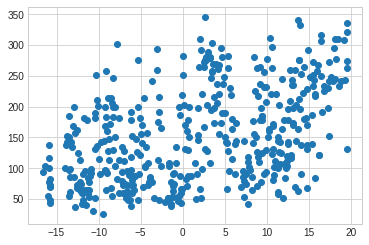

In [35]:
#SVM은 저차원 변화 후 시각화
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y);

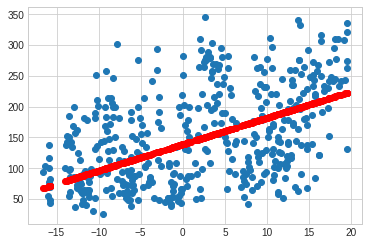

In [36]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [37]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'linear'))

cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.2s finished


{'fit_time': array([0.01721168, 0.013551  , 0.01294112, 0.01211166, 0.00959945]),
 'score_time': array([0.00287533, 0.00278807, 0.00283003, 0.00268888, 0.00182295]),
 'test_score': array([0.43037242, 0.51653341, 0.48275332, 0.42247202, 0.53076481])}

In [38]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVR(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [39]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, kernel='linear'))])

## Kernel SVR

### 캘리포니아 주택 가격

In [40]:
# X, y = fetch_california_housing(return_X_y = True)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [41]:
# #전처리 scaling
# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [42]:
# #linear 아니라 rbf로
# model = SVR(kernel = 'rbf')
# model.fit(X_train, y_train)

In [43]:
# print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
# print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

In [44]:
# #SVM은 저차원 변화 후 시각화
# X_comp = TSNE(n_components = 1).fit_transform(X)
# plt.scatter(X_comp, y);

In [45]:
# model.fit(X_comp, y)
# predict = model.predict(X_comp)
# plt.scatter(X_comp, y)
# plt.scatter(X_comp, predict, color = 'r');

In [46]:
# estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

# cross_validate(
#     estimator = estimator,
#     X = X, y = y,
#     cv = 5,
#     n_jobs = multiprocessing.cpu_count(),
#     verbose = True
# )

In [47]:
# pipe = Pipeline([('scaler', StandardScaler()),
#                      ('model', SVR(kernel = 'rbf'))])

# param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

# gs = GridSearchCV(
#     estimator = pipe,
#     param_grid = param_grid,
#     n_jobs = multiprocessing.cpu_count(),
#     cv = 5,
#     verbose = True
# )

# gs.fit(X,y)

In [48]:
# gs.best_estimator_ #최적의 값들 알려줌

### 당뇨병

In [49]:
X, y = load_diabetes(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [50]:
#전처리 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
#linear 아니라 rbf로
model = SVR(kernel = 'rbf')
model.fit(X_train, y_train)

SVR()

In [52]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.17409706482025555
평가 데이터 점수: 0.2079846298792829


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


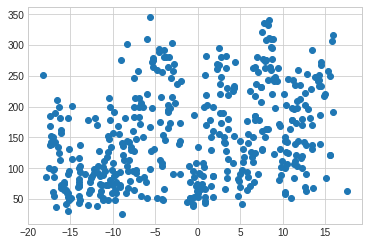

In [53]:
#SVM은 저차원 변화 후 시각화
X_comp = TSNE(n_components = 1).fit_transform(X)
plt.scatter(X_comp, y);

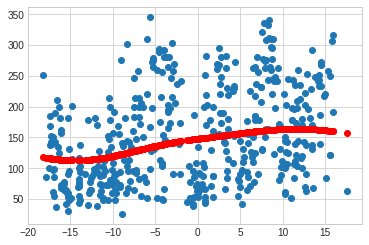

In [54]:
model.fit(X_comp, y)
predict = model.predict(X_comp)
plt.scatter(X_comp, y)
plt.scatter(X_comp, predict, color = 'r');

In [55]:
estimator = make_pipeline(StandardScaler(), SVR(kernel = 'rbf'))

cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.0224824 , 0.01693249, 0.01998353, 0.01646256, 0.01090074]),
 'score_time': array([0.00569105, 0.00598407, 0.00573683, 0.00550699, 0.00367069]),
 'test_score': array([0.14580789, 0.12539919, 0.18163816, 0.12223073, 0.15792085])}

In [56]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVR(kernel = 'rbf'))])

param_grid = [{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             n_jobs=2,
             param_grid=[{'model__kernel': ['rbf', 'polynomial', 'sigmoid']}],
             verbose=True)

In [57]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVR(kernel='sigmoid'))])

In [58]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVR(kernel = 'sigmoid'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],
               'model__epsilon': [1.0, 0.1, 0.01]}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR(kernel='sigmoid'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__epsilon': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [59]:
gs.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVR(epsilon=1.0, gamma='auto', kernel='sigmoid'))])

In [60]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.3556326825396152
평가 데이터 점수: 0.42726602104232314


## Linear SVC

### 유방암

In [61]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [62]:
#전처리 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
#classification: linear SVC
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [64]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9956043956043956
평가 데이터 점수: 0.9649122807017544


In [65]:
#SVC는 데이터 밖에 클래스 구분 되는 부분까지 시각화

def make_meshgrid(x, y, h = 0.02):
  x_min, x_max = x.min() - 1, x.max() + 1
  y_min, y_max = y.min() - 1, y.max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                       np.arange(y_min, y_max, h))
  
  return xx, yy

In [66]:
def plot_contours(clf, xx, yy, **params):
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  out = plt.contourf(xx, yy, Z, **params)

  return out

In [67]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


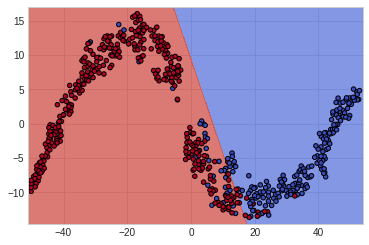

In [68]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [69]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.00923681, 0.00732756, 0.00761294, 0.00977015, 0.00840831]),
 'score_time': array([0.00170135, 0.00145411, 0.00142026, 0.00305557, 0.00112343]),
 'test_score': array([0.96491228, 0.98245614, 0.96491228, 0.96491228, 0.98230088])}

In [70]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [71]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [72]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9868131868131869
평가 데이터 점수: 0.9649122807017544


### 붓꽃

In [73]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [74]:
#전처리 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
#classification: linear SVC
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [76]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


In [77]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


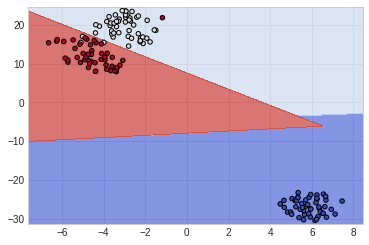

In [78]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [79]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

#cross validation
cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00253153, 0.0037694 , 0.00274467, 0.00171757, 0.00217605]),
 'score_time': array([0.00204682, 0.00140905, 0.00095463, 0.00132108, 0.00064802]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.93333333, 1.        ])}

In [80]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [81]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [82]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9666666666666667


### 와인

In [83]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [84]:
#전처리 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
#classification: linear SVC
model = SVC(kernel = 'linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

In [86]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0


In [87]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


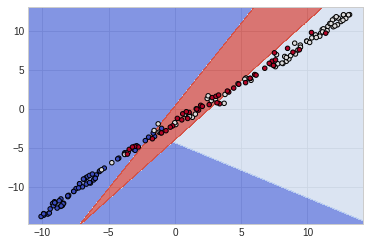

In [88]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [89]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))

cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.01516318, 0.00359368, 0.00965834, 0.00344276, 0.00300908]),
 'score_time': array([0.00121617, 0.00104237, 0.00111127, 0.00107169, 0.00059795]),
 'test_score': array([0.94444444, 0.97222222, 0.97222222, 0.97142857, 0.94285714])}

In [90]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel = 'linear'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC(kernel='linear'))]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [91]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', SVC(C=0.1, kernel='linear'))])

In [92]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 1.0
평가 데이터 점수: 1.0


## Kernel SVC

### 유방암

In [93]:
X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [94]:
#전처리 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [96]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9934065934065934
평가 데이터 점수: 0.9649122807017544


In [97]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


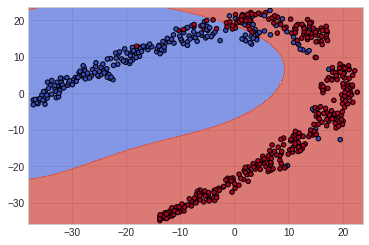

In [98]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [99]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.01070595, 0.0132122 , 0.01050901, 0.01243973, 0.00824666]),
 'score_time': array([0.00342965, 0.0032692 , 0.00524783, 0.00336313, 0.00189662]),
 'test_score': array([0.97368421, 0.95614035, 1.        , 0.96491228, 0.97345133])}

In [100]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel = 'rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [101]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [102]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9934065934065934
평가 데이터 점수: 0.9649122807017544


### 붓꽃

In [103]:
X, y = load_iris(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [104]:
#전처리 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [106]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9


In [107]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


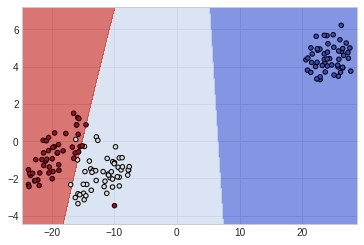

In [108]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [109]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00458384, 0.004848  , 0.0068922 , 0.00234413, 0.00202537]),
 'score_time': array([0.0013895 , 0.00107074, 0.00122046, 0.0010035 , 0.00069618]),
 'test_score': array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])}

In [110]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel = 'rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [111]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [112]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.975
평가 데이터 점수: 0.9


### 와인

In [113]:
X, y = load_wine(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [114]:
#전처리 scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [115]:
model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC()

In [116]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9929577464788732
평가 데이터 점수: 0.9722222222222222


In [117]:
X_comp = TSNE(n_components = 2).fit_transform(X)
X0, X1 = X_comp[:, 0], X_comp[:, 1]
xx, yy = make_meshgrid(X0, X1)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


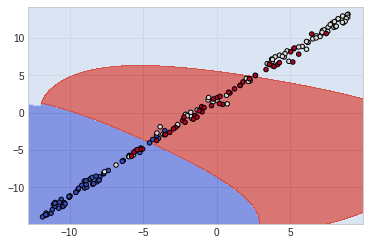

In [118]:
model.fit(X_comp, y)

plot_contours(model, xx, yy, cmap = plt.cm.coolwarm, alpha = 0.7)
plt.scatter(X0, X1, c = y, cmap = plt.cm.coolwarm, s = 20, edgecolors = 'k')

In [119]:
estimator = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

cross_validate(
    estimator = estimator,
    X = X, y = y,
    cv = 5,
    n_jobs = multiprocessing.cpu_count(),
    verbose = True
)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    0.1s finished


{'fit_time': array([0.0164206 , 0.00426745, 0.01551318, 0.00846267, 0.00465202]),
 'score_time': array([0.00144005, 0.00494909, 0.00151777, 0.00154686, 0.00134492]),
 'test_score': array([1.        , 0.97222222, 0.94444444, 1.        , 1.        ])}

In [120]:
pipe = Pipeline([('scaler', StandardScaler()),
                     ('model', SVC(kernel = 'rbf'))])

param_grid = [{'model__gamma': ['scale', 'auto'],
               'model__C': [1.0, 0.1, 0.01],}]

gs = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    n_jobs = multiprocessing.cpu_count(),
    cv = 5,
    verbose = True
)

gs.fit(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVC())]),
             n_jobs=2,
             param_grid=[{'model__C': [1.0, 0.1, 0.01],
                          'model__gamma': ['scale', 'auto']}],
             verbose=True)

In [121]:
gs.best_estimator_ #최적의 값들 알려줌

Pipeline(steps=[('scaler', StandardScaler()), ('model', SVC())])

In [122]:
model = gs.best_estimator_
model.fit(X_train, y_train)

print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9929577464788732
평가 데이터 점수: 0.9722222222222222
